In [ ]:
Nguyễn Thái Bình - 19146050 - Nhóm 02CLC - 11_Money

In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [16]:
trainset='/content/drive/MyDrive/11_Money_data/train'
validationset='/content/drive/MyDrive/11_Money_data/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0.1)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [17]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 341 images belonging to 11 classes.
Found 80 images belonging to 11 classes.


In [18]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'0.2k': 0, '0.5k': 1, '100k': 2, '10k': 3, '1k': 4, '200k': 5, '20k': 6, '2k': 7, '500k': 8, '50k': 9, '5k': 10}
{'0.2k': 0, '0.5k': 1, '100k': 2, '10k': 3, '1k': 4, '200k': 5, '20k': 6, '2k': 7, '500k': 8, '50k': 9, '5k': 10}


In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [20]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=5,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
35/35 [==============================] - 30s 807ms/step - loss: 2.6448 - accuracy: 0.1232 - val_loss: 2.3657 - val_accuracy: 0.1500
Epoch 2/50
35/35 [==============================] - 21s 582ms/step - loss: 2.3946 - accuracy: 0.1232 - val_loss: 2.3490 - val_accuracy: 0.2250
Epoch 3/50
35/35 [==============================] - 20s 577ms/step - loss: 2.3604 - accuracy: 0.1525 - val_loss: 2.2766 - val_accuracy: 0.2250
Epoch 4/50
35/35 [==============================] - 20s 579ms/step - loss: 2.4197 - accuracy: 0.1994 - val_loss: 2.2284 - val_accuracy: 0.2750
Epoch 5/50
35/35 [==============================] - 20s 578ms/step - loss: 2.2195 - accuracy: 0.2405 - val_loss: 1.9632 - val_accuracy: 0.3750
Epoch 6/50
35/35 [==============================] - 20s 585ms/step - loss: 2.1284 - accuracy: 0.3079 - val_loss: 1.6352 - val_accuracy: 0.5000
Epoch 7/50
35/35 [==============================] - 21s 580ms/step - loss: 1.8393 - accuracy: 0.3871 - val_loss: 1.3764 - val_accuracy: 0.6875

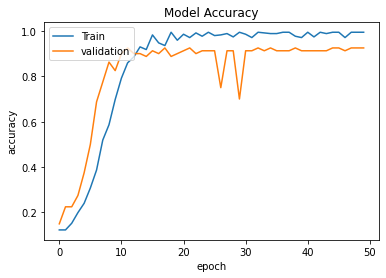

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [23]:
model.save('/content/drive/MyDrive/BT AI/11_Money.h5')

In [24]:
load_model('/content/drive/MyDrive/BT AI/11_Money.h5')

Found 17 images belonging to 1 classes.


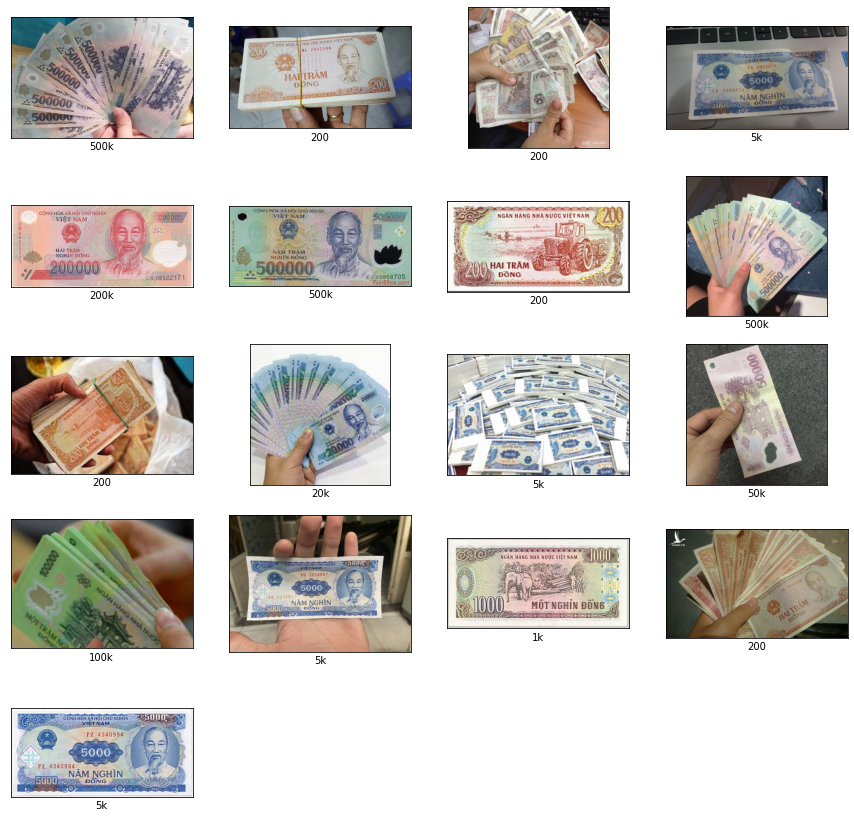

In [29]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/Test money',batch_size=5,shuffle=False,interpolation='lanczos')

money={0:'200',
      1:'500',
      2:'100k',
      3:'10k',
      4:'1k',
      5:'200k',
      6:'20k',
      7:'2k',
      8:'500k',
      9:'50k',
      10:'5k'}
  
plt.figure(figsize=(15,15))
for i in range(len(generator_data.filenames)):
    plt.subplot(5,4,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/Test money/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(money[np.argmax(model.predict(img))]) 
plt.show()